## Step 0: Import necessary packages

In [5]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd
import io
import os

from astropy.io import fits

Search PDS4 for BepiColombo flyby image products

In [6]:
response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") '
                        'and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN") '
                        'and (pds:Investigation_Area.pds:name eq "BepiColombo") '
                        'and (pds:Header.pds:parsing_standard_id eq "FITS 3.0")'
                        'and (pds:Time_Coordinates.pds:start_date_time gt "2022-04-30T00:00:00Z")'
                        '  )&start=0&limit=3000')

#put the page argument in the search

resp_data = response.json()['data']

# print(resp_data)
print('debug')

debug


## Grab image URLS to load for visualization

In [7]:
urls = []
for prod in resp_data:
    try:
        # if '.fits' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0] and 'BepiColombo' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0]:
        urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])
    except KeyError:
        continue


print('debug')



debug


## Tiling of image data
Specify the page you would like to see with the page parameter. Each page has a total of 48 image products plotted.

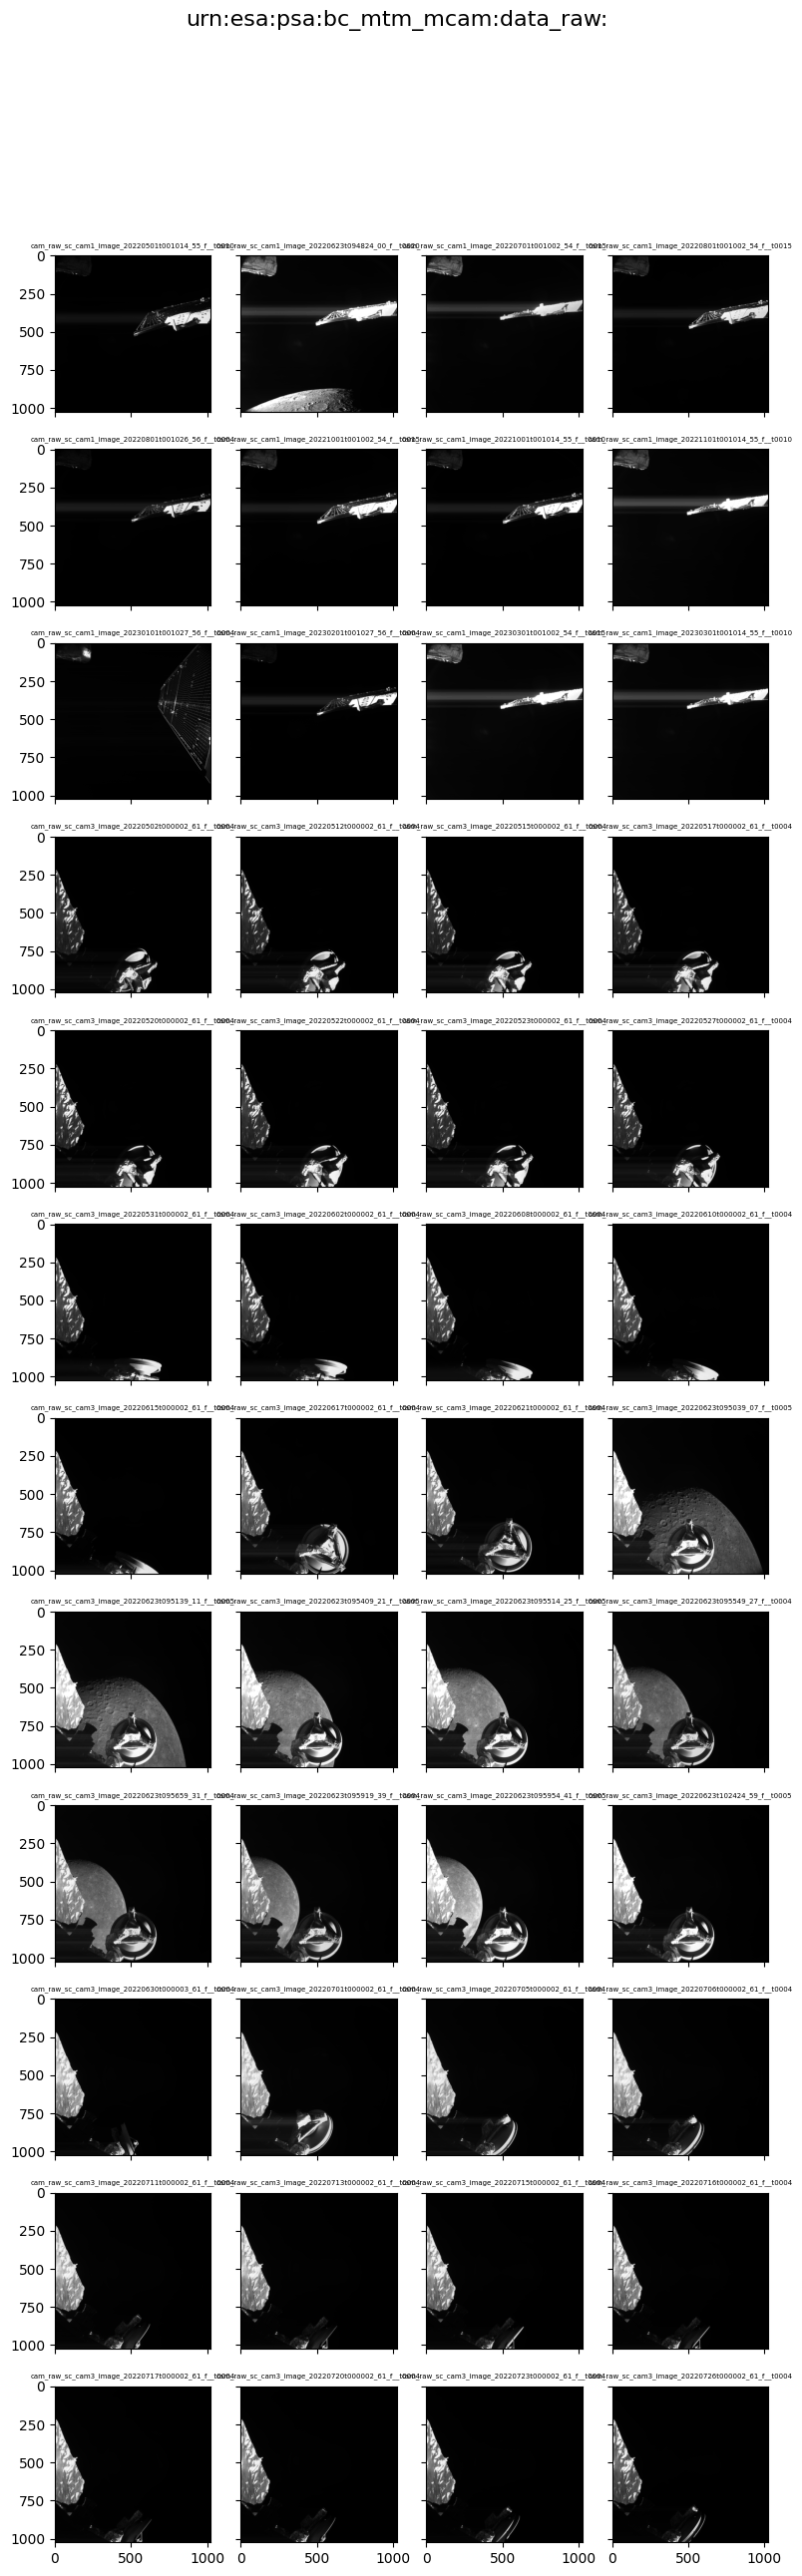

In [22]:
page = 1

fig, axs = plt.subplots(12,4 , figsize=(8, 24))

size = 4*12
for i, image_path in enumerate(urls[size*(page-1):size*page]):
    response = requests.get(image_path[0])
    with fits.open(image_path[0], memmap=True) as hdul:
        image_data = hdul[1].data
    row, col = i // 4, i % 4
    axs[row, col].imshow(image_data, cmap='gray')  # You can change the colormap as needed
    axs[row, col].set_title(resp_data[i]['properties']['lid'][0][33:], fontsize = 4s) # include the full lidvid

#hdul.close()
#clearing memory?
#find a way to monitor memory
#look at open options in the fits.open library
#image_data[0::10] - but better if I can do it at the fits.open
#fix temporal order
#take the last column of the lidvid

for ax in axs.flat:
    ax.label_outer()

plt.suptitle('urn:esa:psa:bc_mtm_mcam:data_raw:', fontsize=16,y=.98)

plt.tight_layout()
plt.show()


In [5]:

response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN") )&start=0&limit=3000')

resp_data = response.json()['data']


counter = -1
urls = []
for prod in resp_data:
    try:
        if '.fits' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0] and 'BepiColombo' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0]:
            urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])
    except KeyError:
        continue


print('debug')


debug


https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201812/cam_raw_sc_cam3_image_20181217t105959_24_f__t0010.fits


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

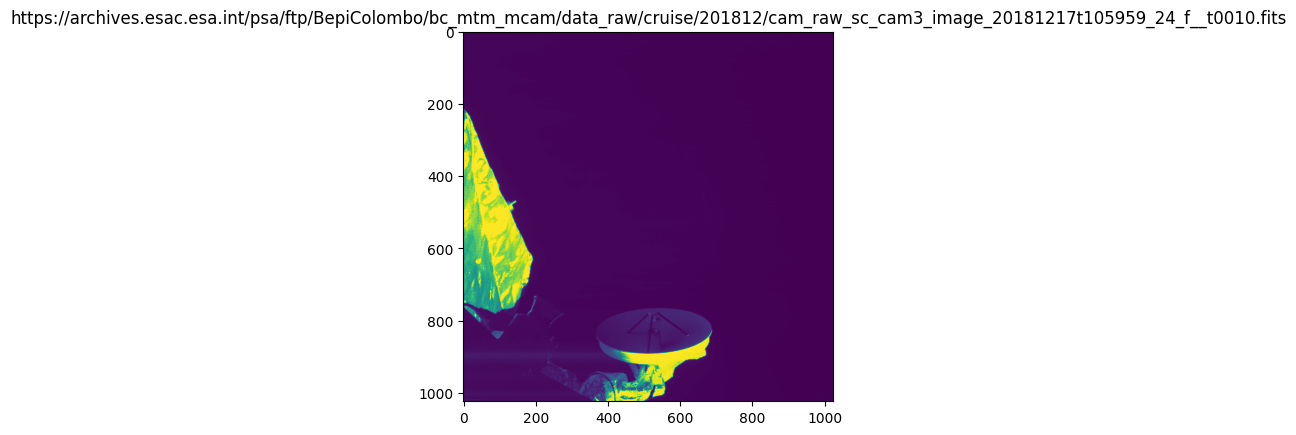

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/flybys/earth_flyby/202004/cam_raw_sc_cam2_image_20200407t125613_60_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/202003/cam_raw_sc_cam3_image_20200330t133102_61_f__t0010.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201902/cam_raw_sc_cam2_image_20190211t063004_62_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201903/cam_raw_sc_cam2_image_20190305t173559_60_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/near_earth_commissioning/201811/cam_raw_sc_cam1_image_20181104t114731_47_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201905/cam_raw_sc_cam3_image_20190517t035514_62_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201903/cam_raw_sc_cam2_image_20190301t174025_60_f__t0020.fits


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [3]:

def display_image_from_url(urls):
    fig, ax = plt.subplots()

    for ind,url in enumerate(urls):
        print(url[0])
        response = requests.get(url[0])
        if response.status_code == 200:
            hdu_list = fits.open(BytesIO(response.content))
            data = hdu_list[1].data
            # data = response.content

            ax.imshow(data)
            ax.set_title(url[0])
            plt.pause(.5)
            plt.draw()
            ax.clear()
            hdu_list.close()
        else:
            print(f"Failed to retrieve {url[0]} with status code {response.status_code}")
    plt.ion()

display_image_from_url(urls)

print('debug')

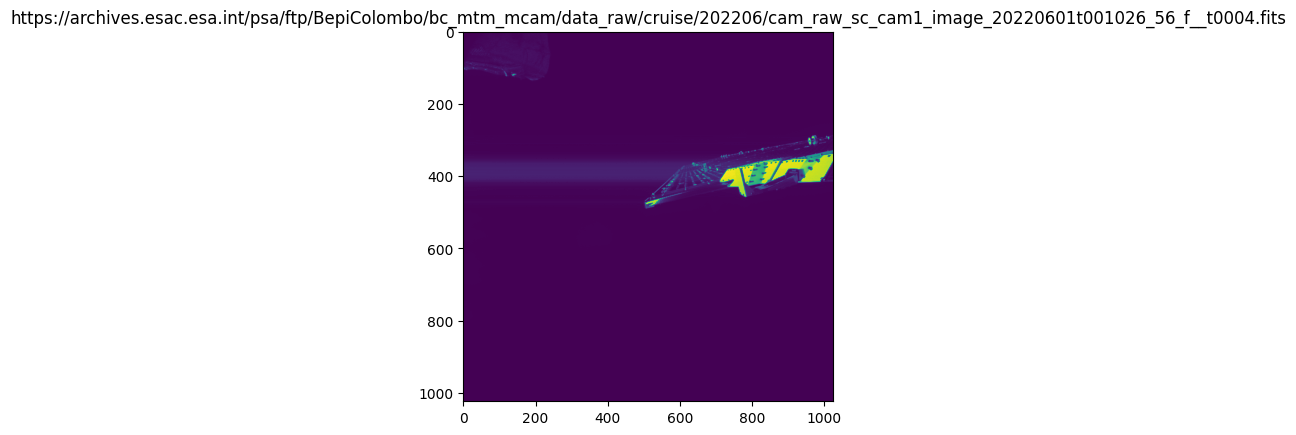

In [24]:
url = resp_data[2]['properties']['ops:Data_File_Info.ops:file_ref'][0]

fig, ax = plt.subplots()
response = requests.get(url)
hdu_list = fits.open(BytesIO(response.content))
data = hdu_list[1].data
# data = response.content

ax.imshow(data)
ax.set_title(url)
plt.draw()
plt.pause(1)
ax.clear()
plt.show()